In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

import sprawl
from sprawl import plotting

CPU times: user 1.75 s, sys: 634 ms, total: 2.38 s
Wall time: 1min 27s


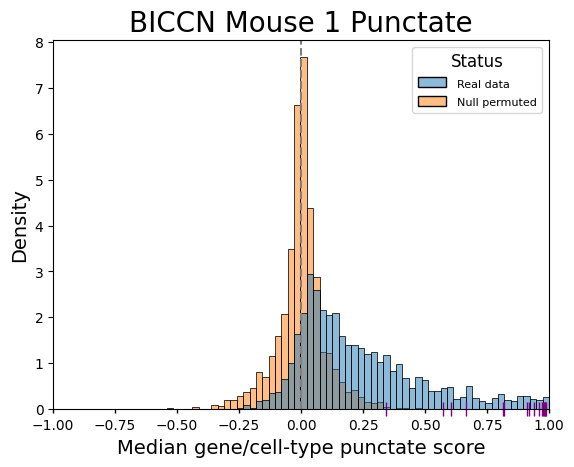

In [2]:
real_punctate = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse1_punctate_gene_ont.csv',
)
real_punctate['Status'] = 'Real data'

sim_punctate = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20221017_perm_5_filt/gene_ont/BICCN_mouse1_punctate_gene_ont.csv',
)
sim_punctate['Status'] = 'Null permuted'

df = pd.concat((real_punctate,sim_punctate),ignore_index=True)

fig = plt.figure()

ax = sns.histplot(
    x = 'med_score',
    hue = 'Status',
    stat = 'density',
    common_norm = False,
    data = df,
)
plt.axvline(0,linestyle='dashed',color='grey')

#show all the Cldn5 med-scores (highly punctate in all cell-types)
median_scores = df[df['Status'].eq('Real data') & df['gene'].eq('Cldn5')]['med_score']
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(median_scores))
ax.tick_params(
    axis='x',which='major',length=3,width=1,color='k',direction='out', labelsize=10,
)
ax.tick_params(
    axis='x',which='minor',length=10,width=1,color='purple',direction='inout',
)
    
    
plt.xlim(-1,1)
plt.xlabel('Median gene/cell-type punctate score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.title('BICCN Mouse 1 Punctate', fontsize=20)
plt.savefig('punctate_overclustering_real_data.svg')
plt.show(fig)
plt.close()

In [14]:
#How many of the gene/cell-types (from real data) have positive vs. negative punctate values
p_v_n = df[df['Status'].eq('Real data')]['med_score'].gt(0).value_counts()
print(p_v_n)
p_v_n/sum(p_v_n)

True     1709
False     249
Name: med_score, dtype: int64


True     0.872829
False    0.127171
Name: med_score, dtype: float64

In [13]:
#How many of the gene/cell-types (from real data) have positive vs. negative punctate values
p_v_n = df[df['Status'].eq('Null permuted')]['med_score'].gt(0).value_counts()
print(p_v_n)
p_v_n/sum(p_v_n)

True     983
False    975
Name: med_score, dtype: int64


True     0.502043
False    0.497957
Name: med_score, dtype: float64

## Are there any genes which are highly punctate in multiple cell-types?

In [3]:
df['metric'].value_counts()

puncta    15147
Name: metric, dtype: int64

In [4]:
df[df['Status'].eq('Real data')].groupby('gene')['med_score'].mean().sort_values()

gene
Tunar     -0.045000
Scgn      -0.044000
Fam19a2   -0.043000
Fosb      -0.036167
Tcap      -0.035500
             ...   
Ctss       0.828353
Cldn5      0.838437
Flt1       0.842056
Mrc1       0.898000
Col24a1    0.905400
Name: med_score, Length: 220, dtype: float64

In [12]:
df[df['Status'].eq('Real data') & df['gene'].eq('Flt1')]['med_score'].sort_values()

611    0.202
624    0.418
626    0.422
621    0.802
622    0.836
610    0.895
618    0.918
625    0.920
619    0.944
613    0.954
627    0.964
615    0.968
623    0.978
617    0.983
614    0.986
612    0.986
620    0.989
616    0.992
Name: med_score, dtype: float64

In [5]:
df[df['Status'].eq('Real data')]['gene'].nunique()

251

In [6]:
#166 of the genes are positively punctate in all the cell-types they appear
df[df['Status'].eq('Real data')].groupby('gene')['med_score'].apply(lambda s: all(s > 0)).sum()

166

In [7]:
punctate_df = df.copy()

# Radial

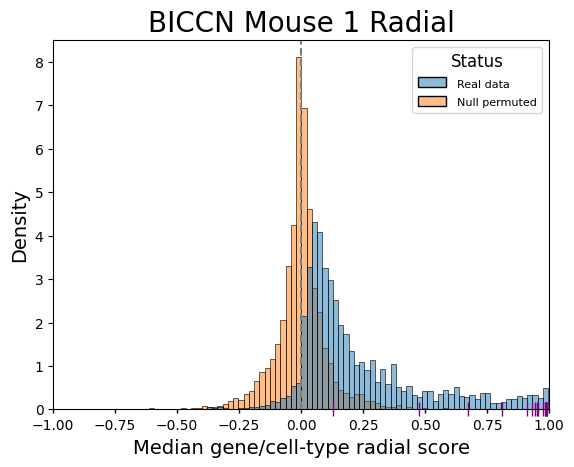

CPU times: user 881 ms, sys: 115 ms, total: 997 ms
Wall time: 1.07 s


In [15]:
%%time
real_radial = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20221014_direct_5_filt/gene_ont/BICCN_mouse1_radial_gene_ont.csv',
)
real_radial['Status'] = 'Real data'

sim_radial = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20221017_perm_5_filt/gene_ont/BICCN_mouse1_radial_gene_ont.csv',
)
sim_radial['Status'] = 'Null permuted'

df = pd.concat((real_radial,sim_radial),ignore_index=True)

fig = plt.figure()

ax = sns.histplot(
    x = 'med_score',
    hue = 'Status',
    stat = 'density',
    common_norm = False,
    data = df,
)
plt.axvline(0,linestyle='dashed',color='grey')

#show all the Cldn5 med-scores (highly radially in all cell-types)
median_scores = df[df['Status'].eq('Real data') & df['gene'].eq('Cldn5')]['med_score']
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(median_scores))
ax.tick_params(
    axis='x',which='major',length=3,width=1,color='k',direction='out', labelsize=10,
)
ax.tick_params(
    axis='x',which='minor',length=10,width=1,color='purple',direction='inout',
)

plt.xlim(-1,1)
plt.xlabel('Median gene/cell-type radial score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.title('BICCN Mouse 1 Radial', fontsize=20)
plt.savefig('radial_overclustering_real_data.svg')
plt.show(fig)
plt.close()

In [17]:
#How many of the gene/cell-types (from real data) have positive vs. negative punctate values
p_v_n = df[df['Status'].eq('Real data')]['med_score'].gt(0).value_counts()
print(p_v_n)
p_v_n/sum(p_v_n)

True     1853
False     105
Name: med_score, dtype: int64


True     0.946374
False    0.053626
Name: med_score, dtype: float64

In [16]:
#How many of the gene/cell-types (from real data) have positive vs. negative punctate values
p_v_n = df[df['Status'].eq('Null permuted')]['med_score'].gt(0).value_counts()
print(p_v_n)
p_v_n/sum(p_v_n)

False    1027
True      931
Name: med_score, dtype: int64


False    0.524515
True     0.475485
Name: med_score, dtype: float64

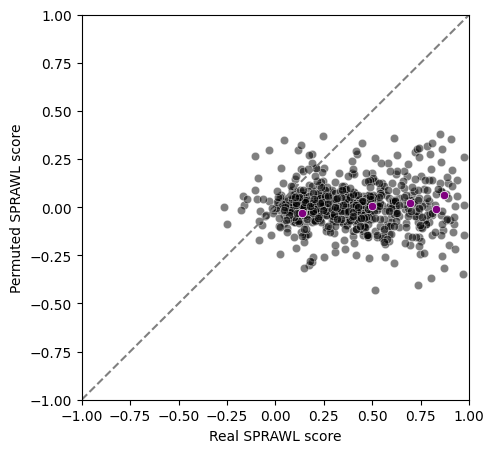

In [9]:
#Plot real vs. permuted and highlight Cldn5
piv_df = df.pivot(
    index=['sample','gene','annotation'],
    values='med_score',
    columns='Status',
).reset_index()

fig = plt.figure(figsize=(5,5))

sns.scatterplot(
    x = 'Real data',
    y = 'Null permuted',
    color = 'black',
    alpha = 0.5,
    data = piv_df,
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('Real SPRAWL score')
plt.ylabel('Permuted SPRAWL score')
plt.plot([-1,1],[-1,1],linestyle='dashed',color='grey')

sns.scatterplot(
    x = 'Real data',
    y = 'Null permuted',
    color = 'purple',
    #alpha = 0.5,
    data = piv_df[piv_df['gene'].eq('Cldn5')],
)

plt.show()
plt.close()

In [10]:
piv_df[piv_df['gene'].eq('Cldn5')].dropna()

Status,sample,gene,annotation,Null permuted,Real data
2743,m1s1,Cldn5,Endo,-0.029,0.136
2769,m1s1,Cldn5,L6_IT_Car3,0.063,0.872
2773,m1s1,Cldn5,OPC,-0.010,0.827
2781,m1s1,Cldn5,SMC,0.008,0.500
2783,m1s1,Cldn5,VLMC,0.020,0.696


### Are there any genes which are highly radial in multiple cell-types?

In [11]:
df[df['Status'].eq('Real data')].groupby('gene')['med_score'].mean().sort_values()

gene
Mrgprx2         -0.261250
Muc20           -0.045800
5031425F14Rik   -0.036333
Blank-6         -0.026000
Prok2           -0.019500
                   ...   
Fbxl7            0.602750
Sox10            0.617556
Ctss             0.628167
Flt1             0.833222
Cldn5            0.839722
Name: med_score, Length: 251, dtype: float64

In [12]:
df[df['Status'].eq('Real data') & df['gene'].eq('Cldn5')].sort_values('med_score')

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,Status
749,BICCN_mouse1,m1s1,radial,Cldn5,Endo,468,37.0,208.0,0.136,4.341539,1.414883e-05,2.803594e-05,Real data
762,BICCN_mouse1,m1s1,radial,Cldn5,SMC,1183,19.0,338.0,0.500,20.831208,0.000000e+00,0.000000e+00,Real data
764,BICCN_mouse1,m1s1,radial,Cldn5,VLMC,613,9.0,328.0,0.696,18.421380,0.000000e+00,0.000000e+00,Real data
759,BICCN_mouse1,m1s1,radial,Cldn5,OPC,88,5.0,300.5,0.827,9.128573,0.000000e+00,0.000000e+00,Real data
748,BICCN_mouse1,m1s1,radial,Cldn5,Astro,171,6.0,231.0,0.864,14.531225,0.000000e+00,0.000000e+00,Real data
756,BICCN_mouse1,m1s1,radial,Cldn5,L6_IT_Car3,50,5.0,683.5,0.872,7.824668,5.107026e-15,2.348458e-14,Real data
750,BICCN_mouse1,m1s1,radial,Cldn5,L23_IT,378,2.0,555.0,0.880,22.158398,0.000000e+00,0.000000e+00,Real data
760,BICCN_mouse1,m1s1,radial,Cldn5,Oligo,226,5.0,281.0,0.911,19.090824,0.000000e+00,0.000000e+00,Real data
754,BICCN_mouse1,m1s1,radial,Cldn5,L6_CT,140,2.0,416.0,0.922,15.055582,0.000000e+00,0.000000e+00,Real data
763,BICCN_mouse1,m1s1,radial,Cldn5,Sst,54,4.0,698.5,0.924,9.439868,0.000000e+00,0.000000e+00,Real data


# Identifying genes that are always positively punctate and radial

In [13]:
radial_df = df.copy()
agg_df = pd.concat((radial_df,punctate_df))
agg_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,Status
0,BICCN_mouse1,m1s1,radial,1700022I11Rik,L23_IT,58,2.0,610.5,0.140,0.725230,0.468311,0.507616,Real data
1,BICCN_mouse1,m1s1,radial,1700022I11Rik,L5_IT,40,2.0,790.0,0.181,1.714301,0.086473,0.106939,Real data
2,BICCN_mouse1,m1s1,radial,1700022I11Rik,L6_IT,23,2.0,765.0,0.444,2.983069,0.002854,0.004265,Real data
3,BICCN_mouse1,m1s1,radial,1810046K07Rik,L23_IT,627,2.0,642.0,0.024,0.711063,0.477045,0.516314,Real data
4,BICCN_mouse1,m1s1,radial,1810046K07Rik,L56_NP,23,2.0,612.0,-0.030,0.067830,0.945921,0.952986,Real data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16826,BICCN_mouse1,m1s1,puncta,Zfp804b,Vip_2,37,2.0,573.0,-0.138,-0.356148,0.721730,0.999403,Null permuted
16827,BICCN_mouse1,m1s1,puncta,Zfp804b,Vip_4,28,3.0,485.5,-0.149,-0.374742,0.707852,0.999403,Null permuted
16828,BICCN_mouse1,m1s1,puncta,Zfp804b,Vip_8,34,3.0,605.5,0.101,0.272414,0.785303,0.999403,Null permuted
16829,BICCN_mouse1,m1s3,puncta,Zfp804b,striatum_1,62,2.0,529.5,-0.120,-0.252714,0.800489,0.999403,Null permuted


In [14]:
agg_df['gene'].nunique()

252

In [15]:
agg_df[agg_df['Status'].eq('Real data')].groupby('gene')['med_score'].apply(lambda s: all(s > 0)).sum()

112

In [16]:
112/252

0.4444444444444444

In [17]:
gs = agg_df[agg_df['Status'].eq('Real data')].groupby('gene')['med_score'].apply(lambda s: all(s > 0))
gs[gs].index.tolist()

['1700022I11Rik',
 'Adamts2',
 'Adamts4',
 'Alk',
 'Ankfn1',
 'Ano4',
 'Aqp4',
 'Asic4',
 'B4galnt2',
 'Bdnf',
 'Bgn',
 'Blank-1',
 'Blnk',
 'Bmpr1b',
 'Brinp3',
 'C1qtnf7',
 'Cacng5',
 'Cdh13',
 'Cdh20',
 'Cdh9',
 'Cemip',
 'Chrm2',
 'Cldn5',
 'Clrn1',
 'Cobll1',
 'Col15a1',
 'Col23a1',
 'Col24a1',
 'Col25a1',
 'Cspg4',
 'Ctss',
 'Dscaml1',
 'Egfem1',
 'Egfr',
 'Elfn1',
 'Enpp6',
 'Epha7',
 'Fam84b',
 'Fbxl7',
 'Fezf2',
 'Flrt3',
 'Flt1',
 'Foxp2',
 'Frem2',
 'Gpc6',
 'Grik1',
 'Grin3a',
 'Grm1',
 'Grm8',
 'Hs3st5',
 'Igf2',
 'Ikzf2',
 'Il4ra',
 'Inpp4b',
 'Iqgap2',
 'Kcng1',
 'Lama3',
 'Lhx6',
 'Lypd1',
 'Mrc1',
 'Myh14',
 'Nhs',
 'Nkain3',
 'Nos1',
 'Nr2f2',
 'Nr4a1',
 'Nxph1',
 'Olfm3',
 'Opalin',
 'Pcdh8',
 'Pdgfc',
 'Pdgfra',
 'Pdlim5',
 'Plekhg3',
 'Pou6f2',
 'Prox1',
 'Prr16',
 'Prss12',
 'Prss23',
 'Ptprk',
 'Ptprm',
 'Ptprt',
 'Ptpru',
 'Reln',
 'Rgs6',
 'Ror1',
 'Rxfp1',
 'Sema5a',
 'Shisa9',
 'Slc25a13',
 'Slc30a3',
 'Slc32a1',
 'Sox10',
 'Sox6',
 'Spon1',
 'St6galnac5',
 '

# Example cells from highly radial gene/cell-types (Cldn5)

In [18]:
real_radial[
    real_radial['med_score'].between(0.5, 1.0)
    & real_radial['gene'].eq('Cldn5')
].sort_values('med_score')

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,Status
762,BICCN_mouse1,m1s1,radial,Cldn5,SMC,1183,19.0,338.0,0.500,20.831208,0.000000e+00,0.000000e+00,Real data
764,BICCN_mouse1,m1s1,radial,Cldn5,VLMC,613,9.0,328.0,0.696,18.421380,0.000000e+00,0.000000e+00,Real data
759,BICCN_mouse1,m1s1,radial,Cldn5,OPC,88,5.0,300.5,0.827,9.128573,0.000000e+00,0.000000e+00,Real data
748,BICCN_mouse1,m1s1,radial,Cldn5,Astro,171,6.0,231.0,0.864,14.531225,0.000000e+00,0.000000e+00,Real data
756,BICCN_mouse1,m1s1,radial,Cldn5,L6_IT_Car3,50,5.0,683.5,0.872,7.824668,5.107026e-15,2.348458e-14,Real data
750,BICCN_mouse1,m1s1,radial,Cldn5,L23_IT,378,2.0,555.0,0.880,22.158398,0.000000e+00,0.000000e+00,Real data
760,BICCN_mouse1,m1s1,radial,Cldn5,Oligo,226,5.0,281.0,0.911,19.090824,0.000000e+00,0.000000e+00,Real data
754,BICCN_mouse1,m1s1,radial,Cldn5,L6_CT,140,2.0,416.0,0.922,15.055582,0.000000e+00,0.000000e+00,Real data
763,BICCN_mouse1,m1s1,radial,Cldn5,Sst,54,4.0,698.5,0.924,9.439868,0.000000e+00,0.000000e+00,Real data
757,BICCN_mouse1,m1s3,radial,Cldn5,L6b,48,4.0,613.5,0.928,9.012492,0.000000e+00,0.000000e+00,Real data


In [19]:
radial_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_radial_gene_cell.csv',
)

radial_cells[
    radial_cells['annotation'].eq('L6_IT')
    & radial_cells['gene'].eq('Cldn5')
    & radial_cells['score'].gt(0.75)
].sort_values('sample')

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,experiment,sample
3360,radial,312566458826470158087589650639532892118,L6_IT,1009,Cldn5,9,0.974,0.334,BICCN_mouse1,m1s1
10706,radial,171933787837892598448669903471638926133,L6_IT,504,Cldn5,3,0.998,0.334,BICCN_mouse1,m1s1
26556,radial,189449813199287462213870064284435890735,L6_IT,680,Cldn5,6,1.000,0.334,BICCN_mouse1,m1s1
37699,radial,324389328945279955741012189265264447862,L6_IT,218,Cldn5,3,0.772,0.334,BICCN_mouse1,m1s1
122359,radial,151552794023348510270923179578308050179,L6_IT,721,Cldn5,5,0.978,0.334,BICCN_mouse1,m1s1
...,...,...,...,...,...,...,...,...,...,...
2913242,radial,204999742056502366271356639542723429629,L6_IT,502,Cldn5,2,0.876,0.334,BICCN_mouse1,m1s6
2934931,radial,173113483342595201278278282893043382417,L6_IT,656,Cldn5,3,0.986,0.334,BICCN_mouse1,m1s6
2956967,radial,14393915099622800319179031045987591051,L6_IT,598,Cldn5,6,0.988,0.334,BICCN_mouse1,m1s6
2809496,radial,274827803155913342952629734994696432091,L6_IT,587,Cldn5,3,0.970,0.334,BICCN_mouse1,m1s6


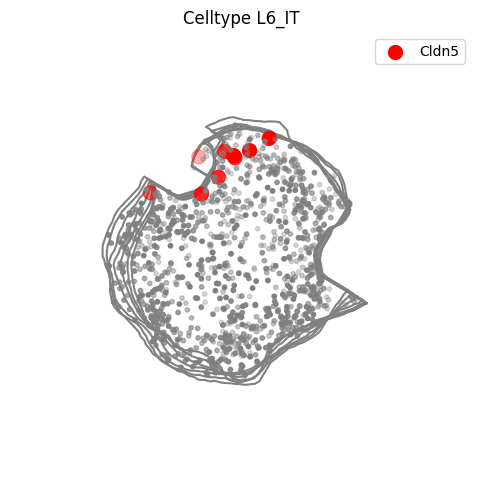

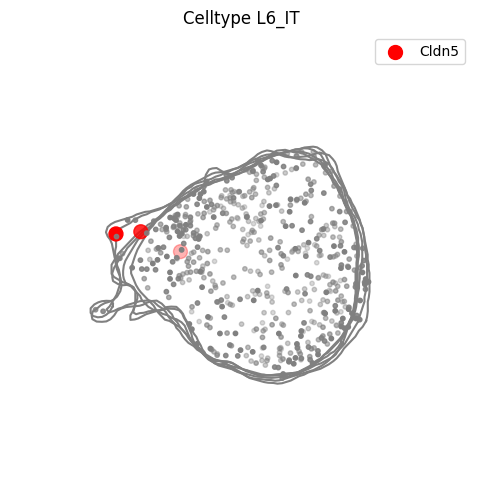

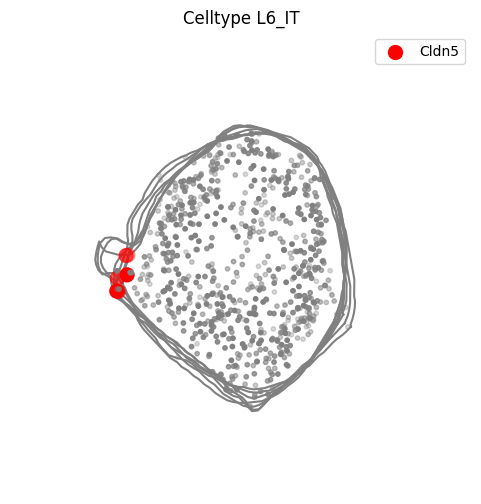

In [20]:
sample = sprawl.HDF5('../../inputs/hdf5s/BICCN_mouse1sample1.hdf5')
cells = sample.get_cells_by_id([
    '312566458826470158087589650639532892118',
    '171933787837892598448669903471638926133',
    '189449813199287462213870064284435890735'
])

for i,cell in enumerate(cells):
    fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Cldn5':'red'})
    ax.view_init(elev=90)
    plt.savefig(f'radial_punctate_example_cells/radial_Cldn5_L6_IT_{i+1}.svg')
    plt.show(fig)
    plt.close()

# Cldn5 is highly radial and punctate even when selecting cells by random

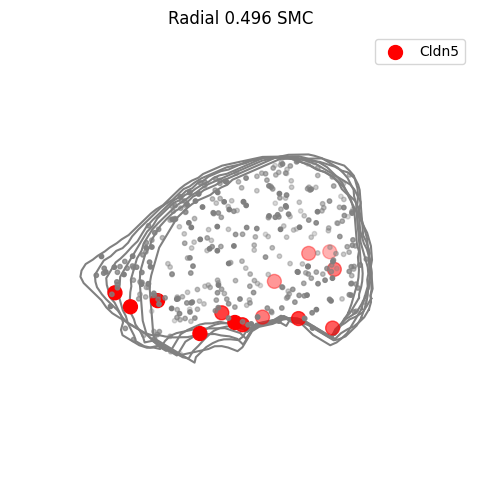

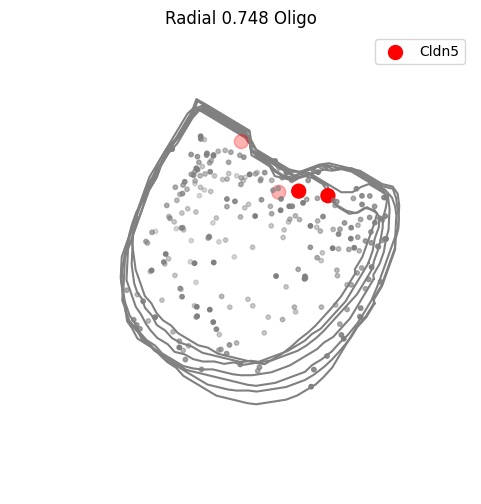

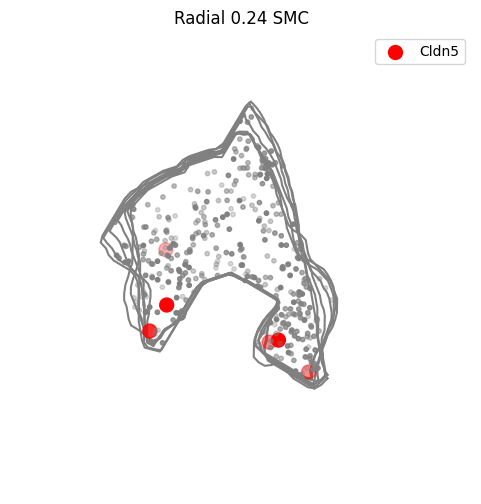

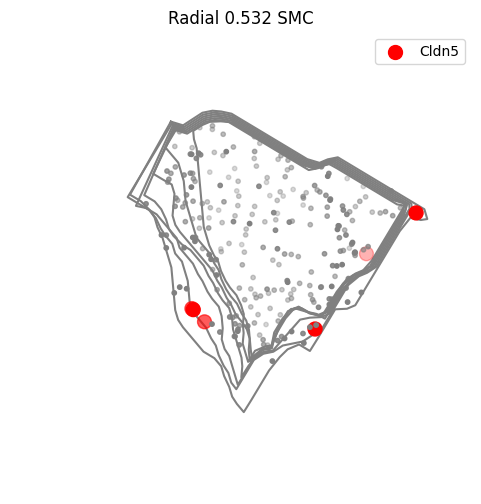

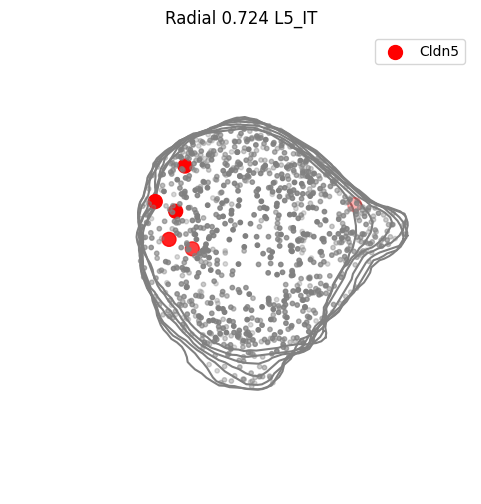

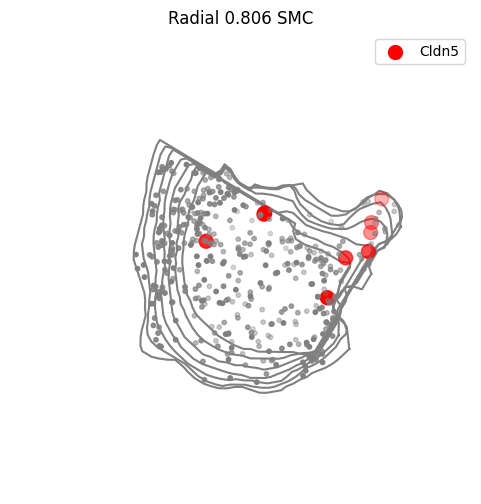

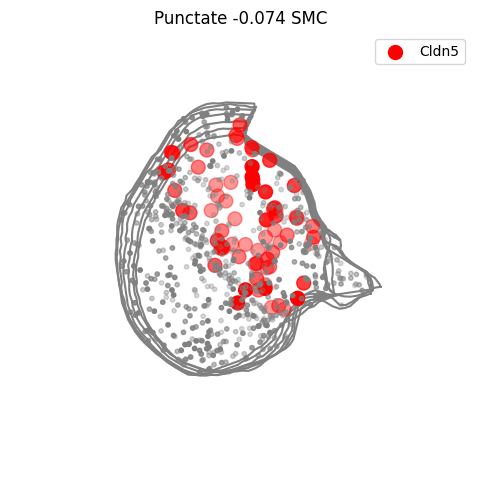

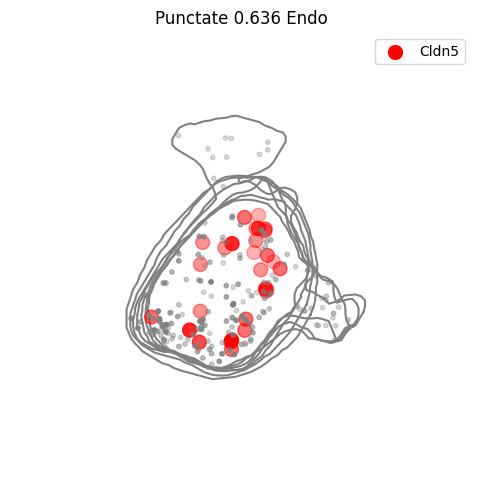

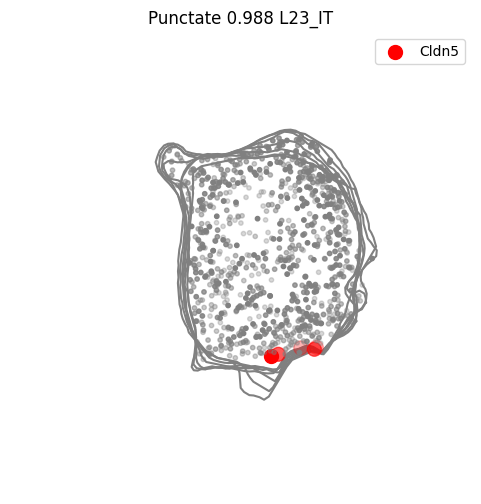

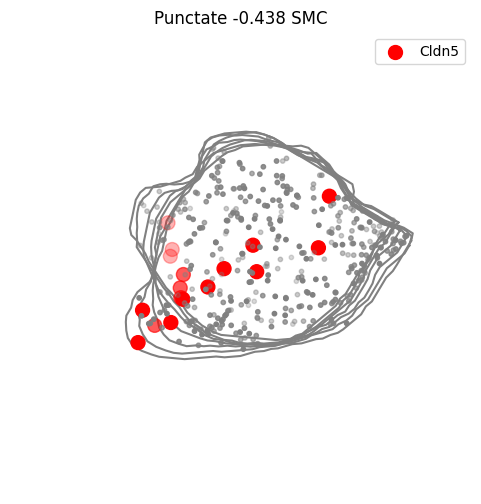

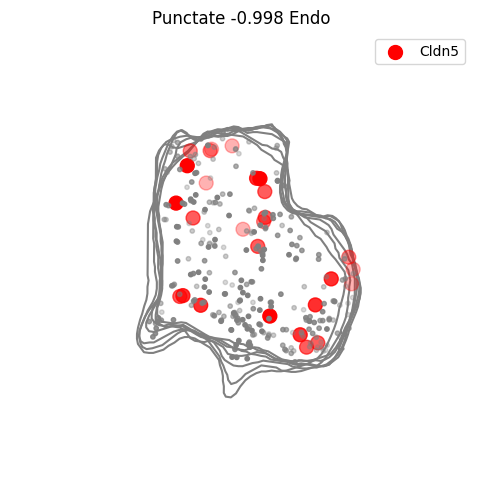

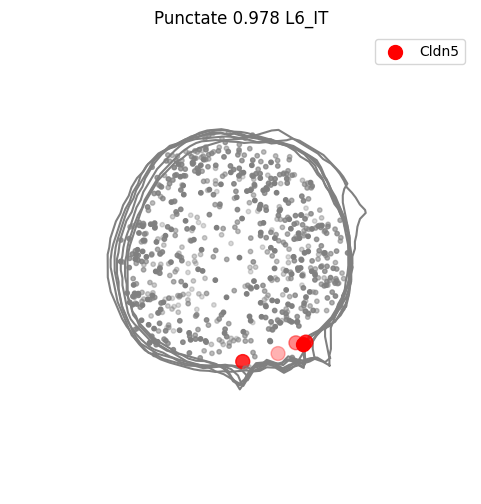

CPU times: user 12 s, sys: 1.35 s, total: 13.3 s
Wall time: 13.4 s


In [36]:
%%time
import matplotlib
np.random.seed(0)

radial_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_radial_gene_cell.csv',
)

punctate_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_punctate_gene_cell.csv',
)

radial_cells = radial_cells[
    radial_cells['gene'].eq('Cldn5')
    & radial_cells['num_gene_spots'].ge(4)
].sort_values('sample')


punctate_cells = punctate_cells[
    punctate_cells['gene'].eq('Cldn5')
    & punctate_cells['num_gene_spots'].ge(4)
].sort_values('sample')



pdf = matplotlib.backends.backend_pdf.PdfPages('cldn5_radial_punctates.pdf')

num_cells = 6

for i,(_,r) in enumerate(radial_cells.sample(num_cells).iterrows()):
    sample = r['sample'][-1]

    sample = sprawl.HDF5(f'../../inputs/hdf5s/BICCN_mouse1sample{sample}.hdf5')
    cells = sample.get_cells_by_id([r['cell_id']])

    for cell in cells:
        fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Cldn5':'red'})
        ax.view_init(elev=90)
        plt.title(f'Radial {r.score} {r.annotation}')
        pdf.savefig()
        plt.show(fig)
        plt.close()
        
        
for i,(_,r) in enumerate(punctate_cells.sample(num_cells).iterrows()):
    sample = r['sample'][-1]

    sample = sprawl.HDF5(f'../../inputs/hdf5s/BICCN_mouse1sample{sample}.hdf5')
    cells = sample.get_cells_by_id([r['cell_id']])

    for cell in cells:
        fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Cldn5':'red'})
        ax.view_init(elev=90)
        plt.title(f'Punctate {r.score} {r.annotation}')
        pdf.savefig()
        plt.show(fig)
        plt.close()
        
pdf.close()

# Flt1 is similarly highly radial/punctate

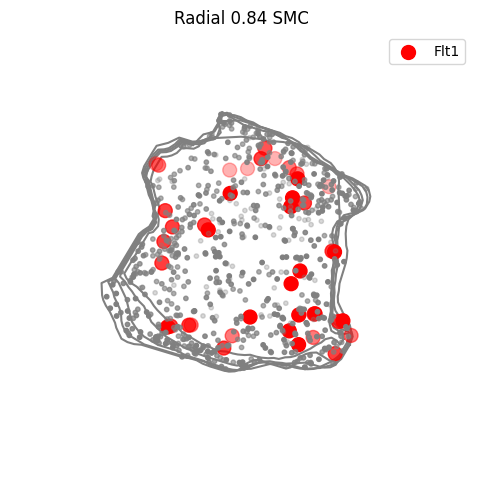

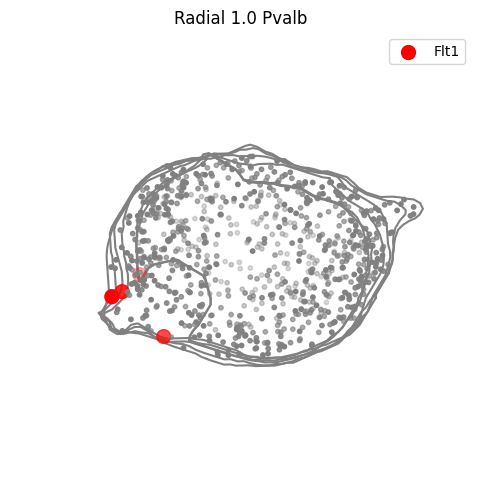

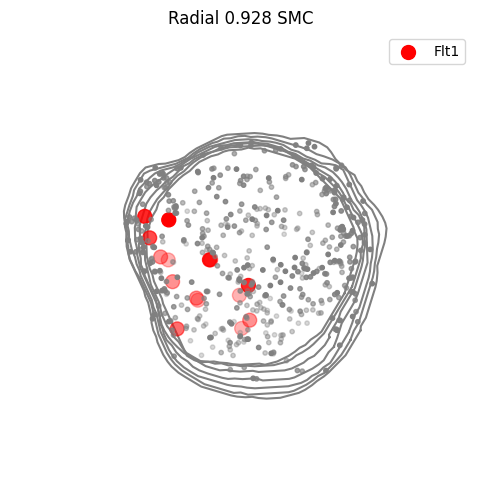

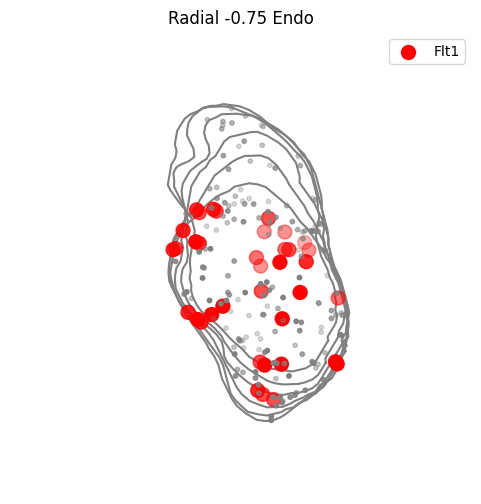

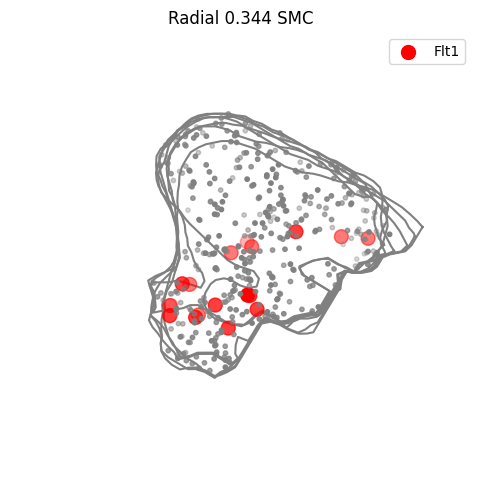

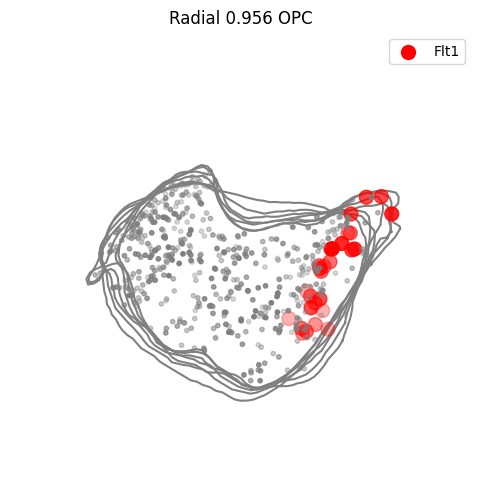

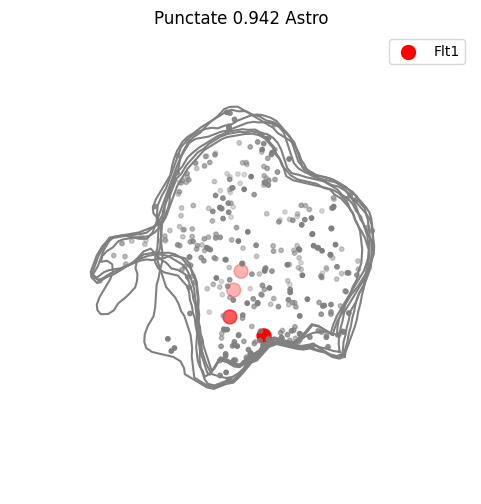

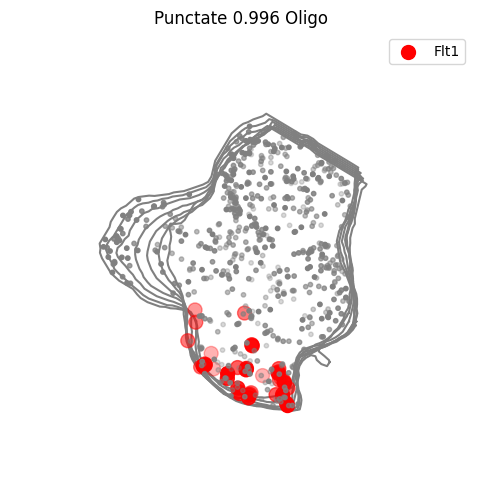

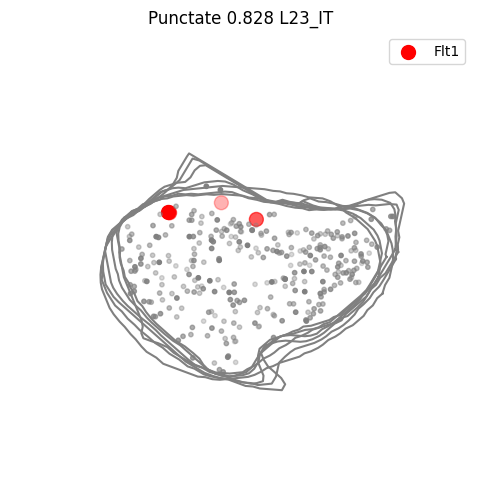

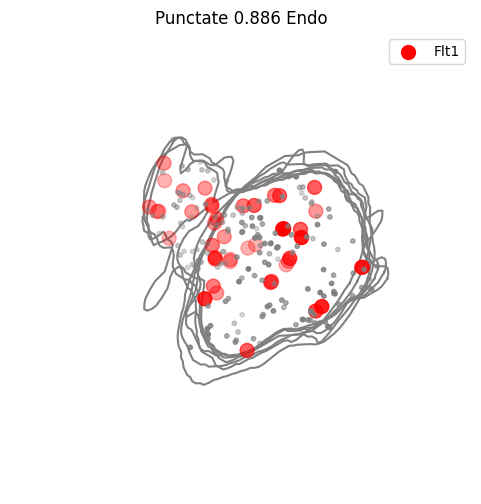

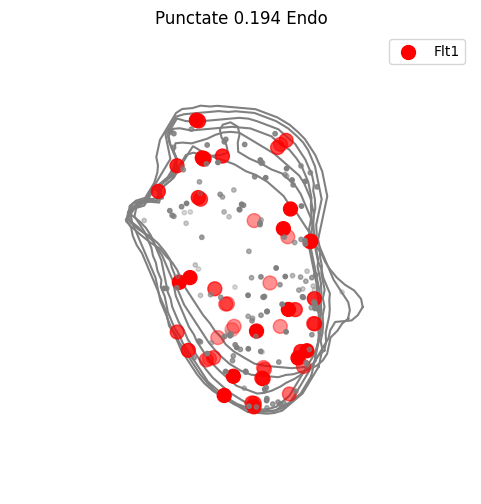

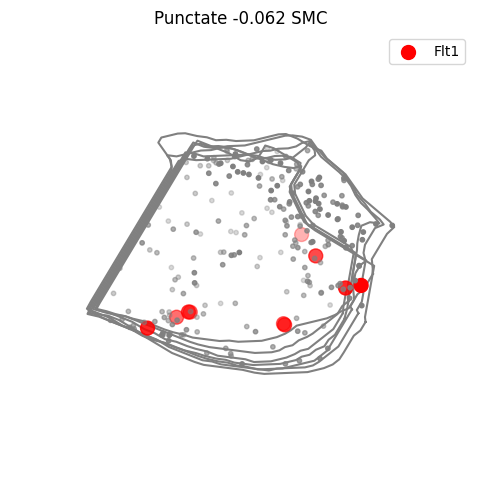

CPU times: user 10.8 s, sys: 1.66 s, total: 12.4 s
Wall time: 13.2 s


In [37]:
%%time
import matplotlib
np.random.seed(0)

radial_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_radial_gene_cell.csv',
)

punctate_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_punctate_gene_cell.csv',
)

radial_cells = radial_cells[
    radial_cells['gene'].eq('Flt1')
    & radial_cells['num_gene_spots'].ge(4)
].sort_values('sample')


punctate_cells = punctate_cells[
    punctate_cells['gene'].eq('Flt1')
    & punctate_cells['num_gene_spots'].ge(4)
].sort_values('sample')



pdf = matplotlib.backends.backend_pdf.PdfPages('flt1_radial_punctates.pdf')

num_cells = 6

for i,(_,r) in enumerate(radial_cells.sample(num_cells).iterrows()):
    sample = r['sample'][-1]

    sample = sprawl.HDF5(f'../../inputs/hdf5s/BICCN_mouse1sample{sample}.hdf5')
    cells = sample.get_cells_by_id([r['cell_id']])

    for cell in cells:
        fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Flt1':'red'})
        ax.view_init(elev=90)
        plt.title(f'Radial {r.score} {r.annotation}')
        pdf.savefig()
        plt.show(fig)
        plt.close()
        
        
for i,(_,r) in enumerate(punctate_cells.sample(num_cells).iterrows()):
    sample = r['sample'][-1]

    sample = sprawl.HDF5(f'../../inputs/hdf5s/BICCN_mouse1sample{sample}.hdf5')
    cells = sample.get_cells_by_id([r['cell_id']])

    for cell in cells:
        fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Flt1':'red'})
        ax.view_init(elev=90)
        plt.title(f'Punctate {r.score} {r.annotation}')
        pdf.savefig()
        plt.show(fig)
        plt.close()
        
pdf.close()

# Example cells from highly punctate gene/cell-types

In [23]:
real_punctate[
    real_punctate['med_score'].between(0.5, 0.75)
].sort_values('med_score')

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,Status
3600,BICCN_mouse1,m1s1,puncta,Wipf3,OPC,320,3.0,293.5,0.500,8.527339,0.000000e+00,0.000000e+00,Real data
3267,BICCN_mouse1,m1s1,puncta,Thsd7a,Endo,29,2.0,221.0,0.502,3.450897,5.587259e-04,8.855003e-04,Real data
653,BICCN_mouse1,m1s1,puncta,Cdh9,Oligo,85,2.0,309.0,0.502,5.084618,3.683658e-07,8.421771e-07,Real data
546,BICCN_mouse1,m1s1,puncta,Cd24a,Astro,56,3.5,251.0,0.502,4.332211,1.476192e-05,2.800151e-05,Real data
1205,BICCN_mouse1,m1s1,puncta,Fbxl7,VLMC,316,2.0,367.5,0.502,9.260560,0.000000e+00,0.000000e+00,Real data
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,BICCN_mouse1,m1s1,puncta,Wipf3,SMC,111,2.0,412.0,0.744,7.367575,1.738609e-13,6.441521e-13,Real data
125,BICCN_mouse1,m1s2,puncta,Ano4,Astro,84,3.0,250.5,0.748,7.007639,2.423839e-12,8.242410e-12,Real data
1638,BICCN_mouse1,m1s1,puncta,Lama3,L5_IT,102,2.0,676.5,0.749,8.449179,0.000000e+00,0.000000e+00,Real data
3547,BICCN_mouse1,m1s1,puncta,Vipr2,L5_IT,27,2.0,680.0,0.750,3.487181,4.881405e-04,7.790568e-04,Real data


In [24]:
punctate_cells = pd.read_csv(
    '../../nf_pipeline/outputs/BICCN_20220601_direct/gene_cell/BICCN_mouse1_punctate_gene_cell.csv',
)

punctate_cells[
    punctate_cells['annotation'].eq('OPC')
    & punctate_cells['gene'].eq('Wipf3')
    & punctate_cells['score'].between(0.5,0.75)
    & punctate_cells['num_gene_spots'].gt(2)
].sort_values('sample')

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,experiment,sample
663985,puncta,200424335501771967308741307745303420976,OPC,428,Wipf3,3,0.552,0.334,BICCN_mouse1,m1s2
701509,puncta,325662329535158384069983822389705634735,OPC,485,Wipf3,5,0.544,0.334,BICCN_mouse1,m1s2
922486,puncta,118356546141312138899957192082711859688,OPC,278,Wipf3,3,0.622,0.334,BICCN_mouse1,m1s2
1313784,puncta,211423867016467265128365186099103833460,OPC,192,Wipf3,6,0.644,0.334,BICCN_mouse1,m1s3
1656303,puncta,182967942844240605063706670937427438464,OPC,351,Wipf3,3,0.570,0.334,BICCN_mouse1,m1s3
1692076,puncta,153978205056300430005825614060820909887,OPC,263,Wipf3,4,0.546,0.334,BICCN_mouse1,m1s3
1833427,puncta,213094590330000493489888105541954328754,OPC,201,Wipf3,4,0.516,0.334,BICCN_mouse1,m1s4
2086686,puncta,294948515250075294070012568170107856037,OPC,179,Wipf3,3,0.718,0.334,BICCN_mouse1,m1s4
3620084,puncta,339976143130768969079842221658114528009,OPC,382,Wipf3,3,0.572,0.334,BICCN_mouse1,m1s5
3612726,puncta,16839474773296052652939510602500723526,OPC,179,Wipf3,5,0.722,0.334,BICCN_mouse1,m1s5


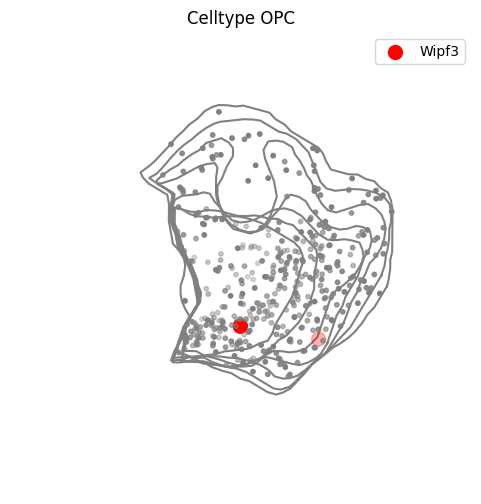

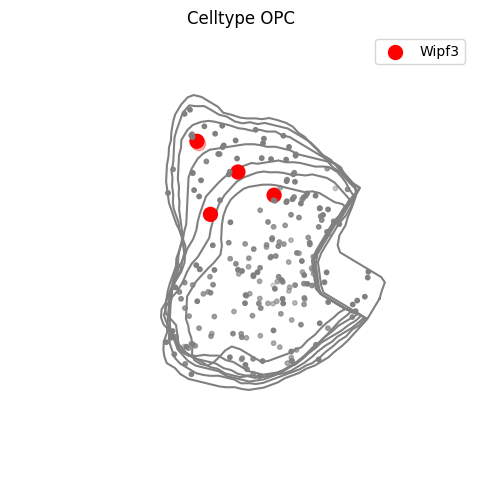

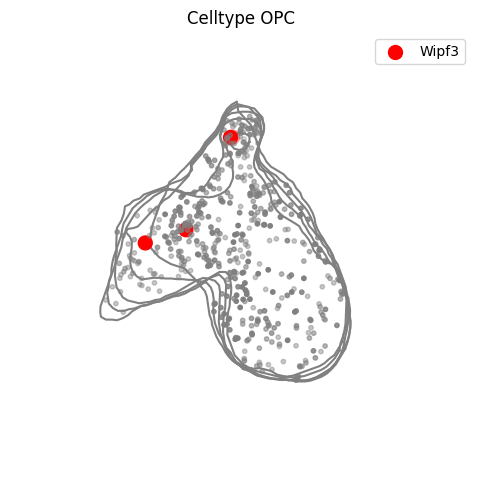

In [25]:
sample = sprawl.HDF5('../../inputs/hdf5s/BICCN_mouse1sample5.hdf5')
cells = sample.get_cells_by_id([
    '339976143130768969079842221658114528009',
    '16839474773296052652939510602500723526',
    '337278934992276781839204767404210983101'
])

for i,cell in enumerate(cells):
    fig,ax = plotting.plot_cell_3D(cell, gene_colors={'Wipf3':'red'})
    ax.view_init(elev=90)
    plt.savefig(f'radial_punctate_example_cells/punctate_Wipf3_OPC_{i+1}.svg')
    plt.show(fig)
    plt.close()